# Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
from sklearn import datasets

#Reading the CSV file and storing it in the data frame object named df

df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",names=['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','class'])

In [2]:
#Handling
del df['Fe']
del df['Ba']

In [3]:
df

,RI,Na,Mg,Al,Si,K,Ca,class
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1
...,...,...,...,...,...,...,...,...
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,7
211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,7
212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,7
213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,7


In [4]:
n= df.shape[0]  ## n denotes no. of rows or data instances
print(n)

214


 ## Random Forest Classifier

Important Hyperparameters are:
    
1. n_estimators
2. criterion{“gini”, “entropy”}, default=”gini”
3. max_depth int, default=None
4. Random State

In [5]:
from sklearn import tree

y = df['class']
X = df.drop('class',axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)

from sklearn.preprocessing import StandardScaler

# Scale X object

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)

X_test = sc_X.fit_transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [8]:
from sklearn.tree import export_graphviz

random_fuck=random_forest_classifier[1]
# Export as dot file
export_graphviz(random_fuck, out_file='tree.dot', 
                feature_names = df.columns[0:7],
                class_names = ['1','2','3','4','5','6','7'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [9]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [10]:
y_pred_random_forest = random_forest_classifier.predict(X_test)

## Accuracy Score

In [11]:
# finding percentage accuracy

print(accuracy_score(y_test, y_pred_random_forest))

0.5406976744186046


## classification report

In [12]:
print(classification_report(y_test,y_pred_random_forest)) 

              precision    recall  f1-score   support

           1       0.65      0.54      0.59        56
           2       0.45      0.86      0.59        58
           3       0.00      0.00      0.00        14
           5       0.00      0.00      0.00        12
           6       0.50      0.12      0.20         8
           7       0.92      0.50      0.65        24

    accuracy                           0.54       172
   macro avg       0.42      0.34      0.34       172
weighted avg       0.52      0.54      0.49       172



C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Feature Importance

In [13]:
import pandas as pd
feature_imp = pd.Series(random_forest_classifier.feature_importances_,index=df.columns[0:7]).sort_values(ascending=False)
feature_imp

Mg    0.255212
Al    0.155920
K     0.145492
Na    0.145464
Ca    0.116186
RI    0.095633
Si    0.086093
dtype: float64

No handles with labels found to put in legend.


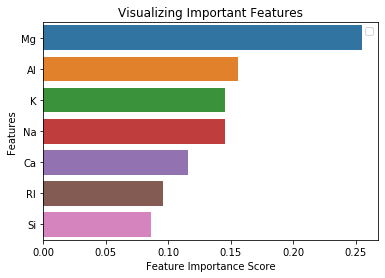

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


## Hyperparameter n_estimators variation

Text(0, 0.5, 'Accuracy')

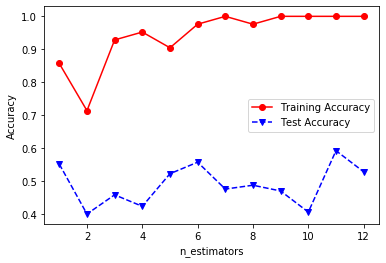

In [22]:
# Model fitting and evaluation

n_estimators = [1,2,3,4,5,6,7,8,9,10,11,12]

trainAcc = np.zeros(len(n_estimators))
testAcc = np.zeros(len(n_estimators))

index = 0
for d in n_estimators:
    clf = RandomForestClassifier(n_estimators = d)
    clf = clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1
    
# Plot of training and test accuracies
    
plt.plot(n_estimators,trainAcc,'ro-',n_estimators,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')

### n_estimators 6 and 11 give good test accuracy

## Hyperparameter max_depth variation

Text(0, 0.5, 'Accuracy')

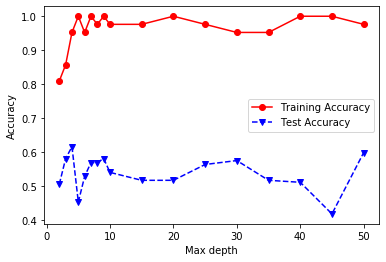

In [25]:
# Model fitting and evaluation

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]

trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = RandomForestClassifier(n_estimators = 11,max_depth=depth)
    clf = clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1
    
# Plot of training and test accuracies
    
plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

### Max_depth 4 gives maximum accuracy

## Hyperparameter criterion variation

Text(0, 0.5, 'Accuracy')

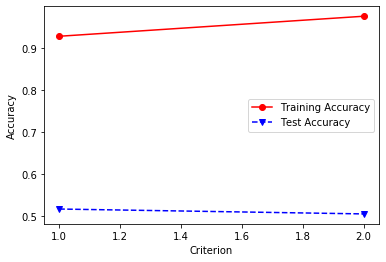

In [26]:
# Model fitting and evaluation

index = 0
criterion = ['gini','entropy']
maxtype=[1,2]

trainAcc = np.zeros(len(maxtype))
testAcc = np.zeros(len(maxtype))

for d in criterion :
    clf = RandomForestClassifier(n_estimators = 11,max_depth=4,criterion=d)
    clf = clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1
    
# Plot of training and test accuracies
    
plt.plot([1,2],trainAcc,'ro-',maxtype,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Criterion')
plt.ylabel('Accuracy')

### criterion 'gini' gives more accuracy

## Hyperparameter random state variation

Text(0, 0.5, 'Accuracy')

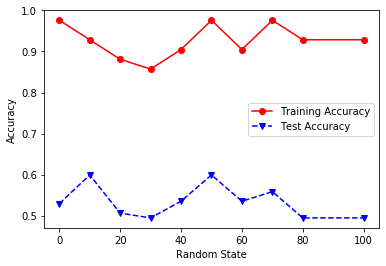

In [27]:
# Model fitting and evaluation

ram_state = [0,10,20,30,40,50,60,70,80,100]

trainAcc = np.zeros(len(ram_state))
testAcc = np.zeros(len(ram_state))

index = 0
for state in ram_state:
    clf = RandomForestClassifier(n_estimators = 11,max_depth=4,criterion='gini',random_state=state)
    clf = clf.fit(X_train, y_train)
    Y_predTrain = clf.predict(X_train)
    Y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, Y_predTrain)
    testAcc[index] = accuracy_score(y_test, Y_predTest)
    index += 1
    
    
# Plot of training and test accuracies
    
plt.plot(ram_state,trainAcc,'ro-',ram_state,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Random State')
plt.ylabel('Accuracy')

### Random state 50 gives maximum accuracy

# K fold Cross Validation

In [15]:
## Randomly Shuffle the data
df=df.sample(frac=1)

In [16]:
df

,RI,Na,Mg,Al,Si,K,Ca,class
177,1.51905,14.00,2.39,1.56,72.37,0.00,9.57,6
9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,1
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,7
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,1
65,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,1
...,...,...,...,...,...,...,...,...
99,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,2
98,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,2
122,1.51663,12.93,3.54,1.62,72.96,0.64,8.03,2
137,1.51806,13.00,3.80,1.08,73.07,0.56,8.38,2


In [35]:
## making our folds

k = 10
folds = np.array_split(df, k)

## function to perform our accuracy testing

def perform(Train, test):
    # remove labels from data
    """
    train_labels = train_set.pop('class').values
    test_labels = test_set.pop('class').values
    clf.fit(train_set, train_labels)
    
    print("Accuracy Score is:",clf.score(test_set, test_labels))
    """
    
    X_train=Train.values[:,:7]
    X_test=Train.values[:,7]
    y_train=test.values[:,:7]
    y_test=test.values[:,7]
    
    random_forest_classifier = RandomForestClassifier(n_estimators = 11, criterion = 'gini', random_state = 50)
    random_forest_classifier.fit(X_train, X_test)
    
    y_pred = random_forest_classifier.predict(y_train) # getting predictions from the classifier
    
    
    print("Accuracy score is :",accuracy_score(y_test,y_pred),'\n') # calculating accuracy
    print("Confusion Matrix is :\n\n",confusion_matrix(y_test,y_pred))
    print("\nClassification Report is as follows :\n")
    print(classification_report(y_test,y_pred))
    
variance_arr=[0]*10

for i in range(k):
    train = folds.copy() ##you wanna work on a copy of your array
    test = folds[i]
    del train[i]
    train = pd.concat(train, sort=False)
    print("Test set is fold number :",i+1)
    variance_arr[i]= perform(train.copy(), test.copy()) ##do the fitting, here you also want to copy
    print("------------------------------------------------------------------------------------------")
    
##In this function you remove the label column from your sets and fit the scikit-classifier (clf) and then return the prediction.

Test set is fold number : 1
Accuracy score is : 0.8636363636363636 

Confusion Matrix is :

 [[6 0 0 0 0]
 [1 5 0 0 0]
 [1 0 1 0 0]
 [0 0 0 3 0]
 [0 1 0 0 4]]

Classification Report is as follows :

              precision    recall  f1-score   support

         1.0       0.75      1.00      0.86         6
         2.0       0.83      0.83      0.83         6
         3.0       1.00      0.50      0.67         2
         6.0       1.00      1.00      1.00         3
         7.0       1.00      0.80      0.89         5

    accuracy                           0.86        22
   macro avg       0.92      0.83      0.85        22
weighted avg       0.89      0.86      0.86        22

------------------------------------------------------------------------------------------
Test set is fold number : 2
Accuracy score is : 0.6818181818181818 

Confusion Matrix is :

 [[ 2  1  0  0  0  0]
 [ 1 10  1  0  0  0]
 [ 0  2  1  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  0  1]]



C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIBHU GOYAL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\VIBHU GOYAL\anaconda3\lib\site-packa